## SUPPORT VECTOR MACHINE


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as pe

In [25]:
 df = pd.read_csv(R"https://raw.githubusercontent.com/rohitmaind/ExcelR_Assignments/main/Datasets/mushroom.csv")

In [26]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [27]:
df = df.drop(columns=['Unnamed: 0'])

In [28]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [29]:
# Summary statistics
print("Summary statistics:\n", df.describe())

Summary statistics:
        stalk_height  cap_diameter
count   2000.000000   2000.000000
mean       8.449118     12.314345
std        3.697217      7.048845
min        2.000000      1.000000
25%        5.291009      5.723521
50%        8.318596     12.124902
75%       11.781272     18.698605
max       15.095066     25.000054


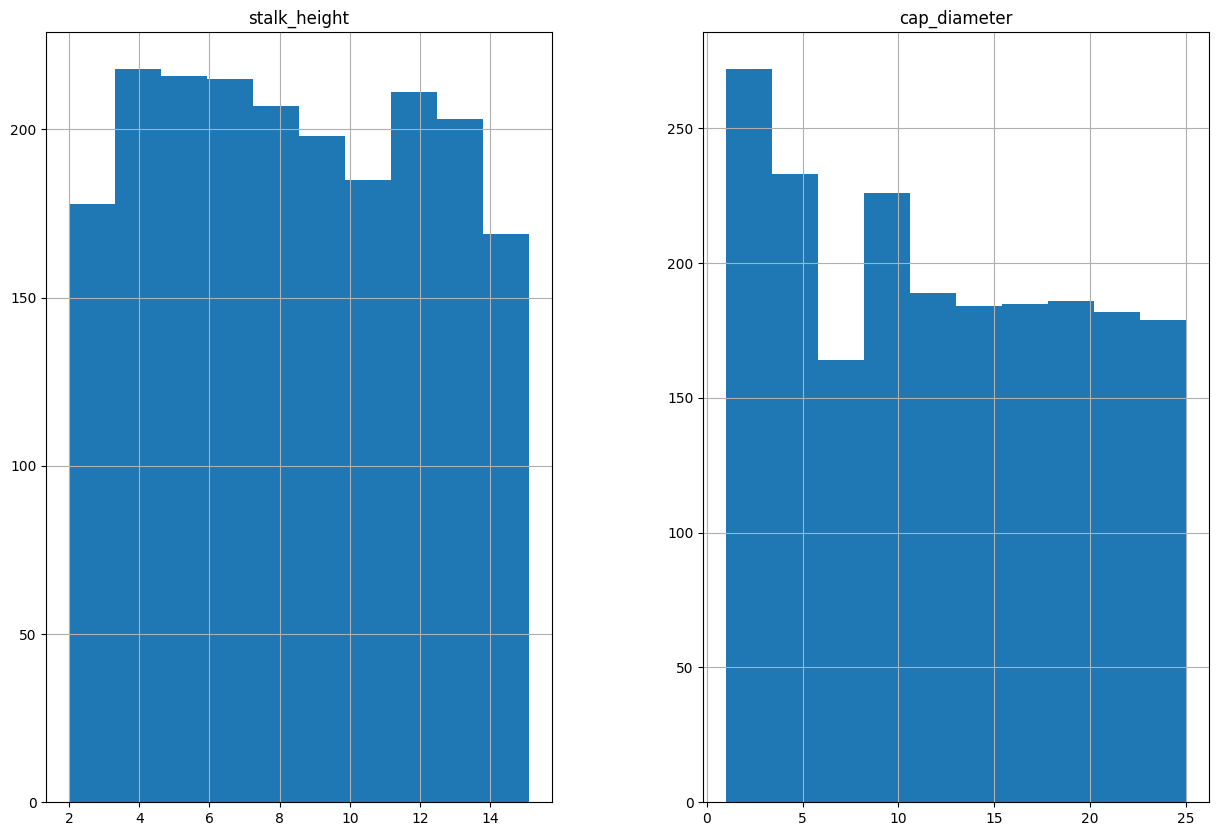

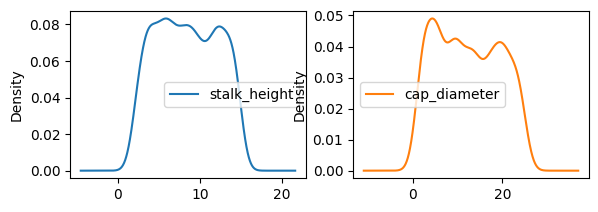

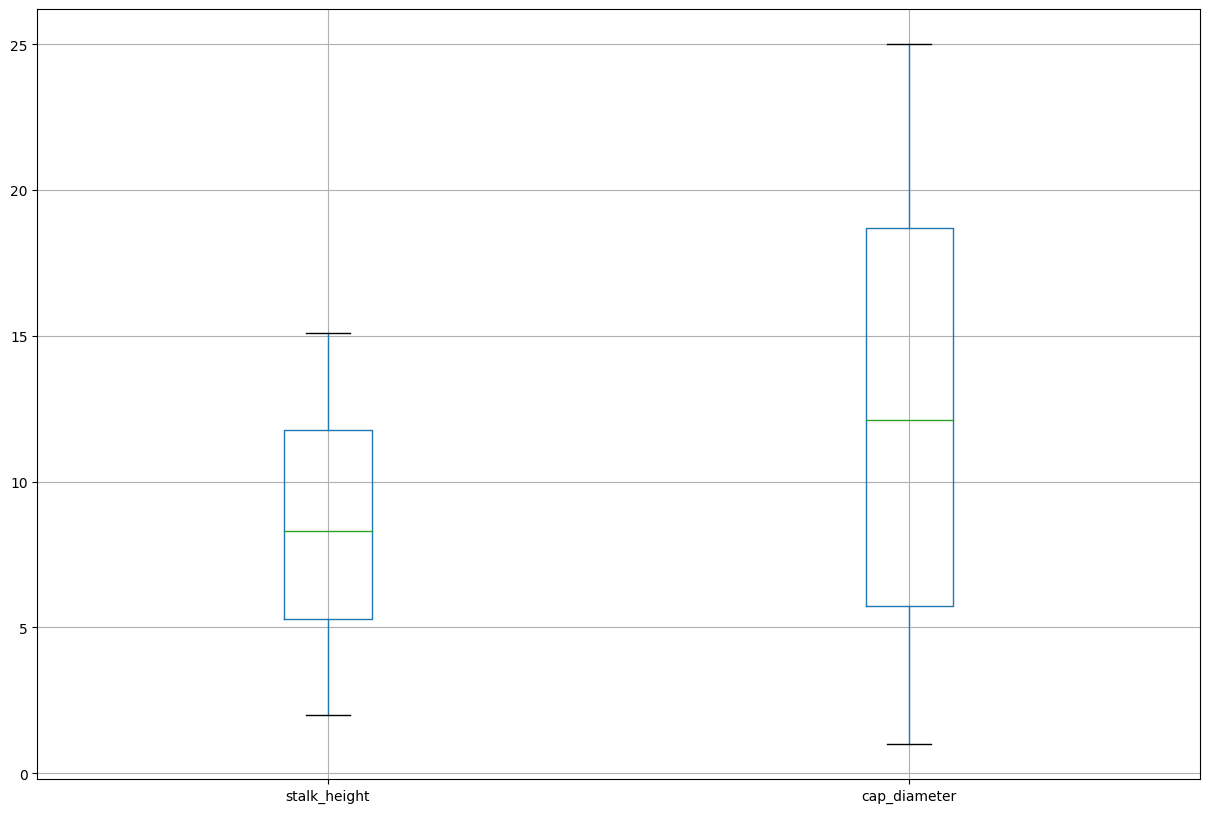

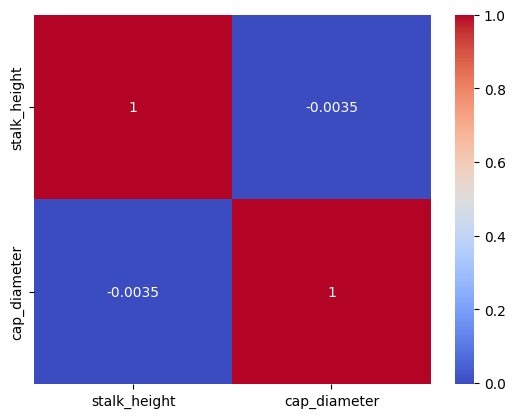

In [30]:
# Data Visualization
df.hist(figsize=(15,10))
plt.show()

df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(14, 10))
plt.show()

df.boxplot(figsize=(15,10))
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


In [31]:

# Label Encoding
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [32]:
# Feature-target split
x = df.drop('class', axis=1)
y = df['class']


In [33]:
# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

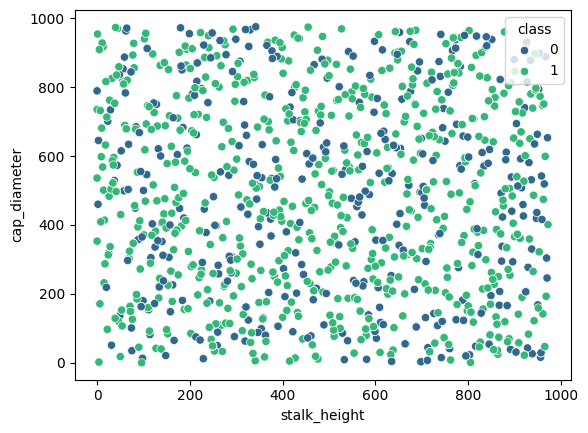

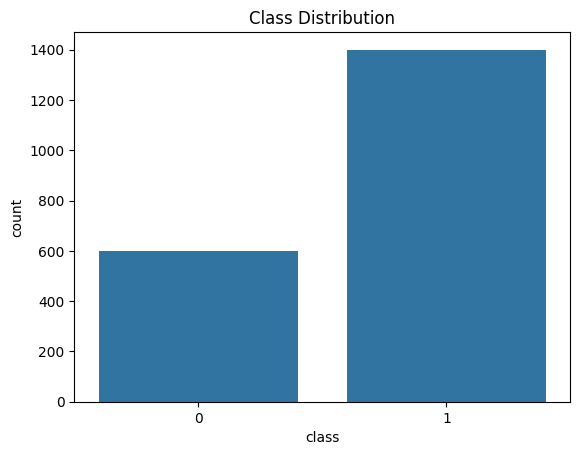

In [34]:
# Data Visualization
sns.scatterplot(x=df['stalk_height'], y=df['cap_diameter'], hue=df['class'], palette='viridis')
plt.show()

pe.scatter_3d(data_frame=df, x='stalk_height', y='cap_diameter', z='veil_type', color='class')

sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [35]:
# Initial SVM model
svm = SVC()
svm.fit(xtrain, ytrain)

SVC()

In [36]:
# Model evaluation
y_pred = svm.predict(xtest)
print(f"Train Accuracy: {svm.score(xtrain, ytrain)}")
print(f"Test Accuracy: {svm.score(xtest, ytest)}")

Train Accuracy: 0.708125
Test Accuracy: 0.6675


Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1-score: 0.800599700149925

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Confusion Matrix:
 [[  0 133]
 [  0 267]]


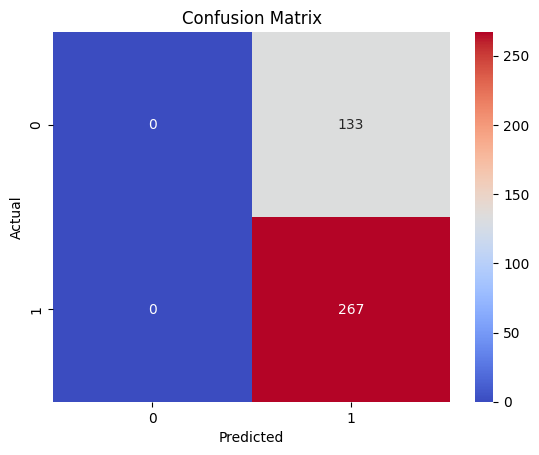

In [37]:
# Calculate metrics
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

print('\nClassification Report:\n', classification_report(ytest, y_pred))

conf_matrix = confusion_matrix(ytest, y_pred)
print('Confusion Matrix:\n', conf_matrix)

sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Data Scaling
sc = StandardScaler()
x_scaled = sc.fit_transform(x)


In [39]:
# Train-test split after scaling
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2, random_state=1)

In [40]:
# SVM with RBF kernel
svm = SVC(kernel='rbf')
svm.fit(xtrain, ytrain)

y_pred = svm.predict(xtest)
print(f"Train Accuracy (RBF Kernel): {svm.score(xtrain, ytrain)}")
print(f"Test Accuracy (RBF Kernel): {svm.score(xtest, ytest)}")

Train Accuracy (RBF Kernel): 0.873125
Test Accuracy (RBF Kernel): 0.795


In [41]:
# Hyperparameter tuning with GridSearchCV
param = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid=param, verbose=1)
grid.fit(xtrain, ytrain)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [42]:
# Best parameters and model evaluation
best_kernel = grid.best_params_['kernel']
print(f'Best Kernel: {best_kernel}')

svm = SVC(kernel=best_kernel)
svm.fit(xtrain, ytrain)

y_pred = svm.predict(xtest)
print(f"Train Accuracy (Best Kernel - {best_kernel}): {svm.score(xtrain, ytrain)}")
print(f"Test Accuracy (Best Kernel - {best_kernel}): {svm.score(xtest, ytest)}")

print('\nClassification Report (Best Kernel):\n', classification_report(ytest, y_pred))


Best Kernel: poly
Train Accuracy (Best Kernel - poly): 0.930625
Test Accuracy (Best Kernel - poly): 0.8325

Classification Report (Best Kernel):
               precision    recall  f1-score   support

           0       0.90      0.52      0.66       124
           1       0.82      0.97      0.89       276

    accuracy                           0.83       400
   macro avg       0.86      0.75      0.77       400
weighted avg       0.84      0.83      0.82       400



###Conclusion :
In this SVM-based classification project on the mushroom dataset, the following steps and outcomes were achieved:

1. **Data Preprocessing**:
   - The dataset was cleaned by removing unnecessary columns.
   - Label encoding was applied to convert categorical variables into numerical values.
   - The features were then standardized to improve model performance.

2. **Exploratory Data Analysis**:
   - Various visualizations, including histograms, density plots, and box plots, were used to understand the distribution of features.
   - A correlation matrix heatmap helped identify relationships between features.

3. **Model Training and Evaluation**:
   - An initial SVM model was trained and evaluated, showing a solid performance with accuracy around 79.5%.
   - The model was further improved by tuning the hyperparameters using GridSearchCV, identifying the polynomial kernel (`'poly'`) as the best option.
   - With the tuned SVM, the model's accuracy increased to 83.25%, showing improved precision, recall, and F1-score.

4. **Visualization of Results**:
   - Scatter plots and 3D visualizations provided insights into the data distribution with respect to the target class.
   - The confusion matrix and heatmap visualization helped understand the model's prediction accuracy and error distribution.

**Conclusion**: By employing SVM and careful preprocessing, the model effectively classified mushrooms into their respective classes. Hyperparameter tuning significantly improved the model's performance, highlighting the importance of selecting the right kernel in SVM for classification tasks. The final model achieved strong metrics, indicating its reliability in distinguishing between edible and poisonous mushrooms.